<a href="https://colab.research.google.com/github/yongsa-nut/SF251_67_2/blob/main/Regression_Stats_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from plotnine import *

## Linear Regression from Statistical Perspective

In [ ]:
# simulated data
x = np.arange(1, 21)  # creates array from 1 to 20
n = len(x)
a = 0.2
b = 0.3
sigma = 0.5
y = a + b*x + sigma*np.random.normal(size=n)

X = pd.DataFrame({'x':x})
sim_df = pd.DataFrame({'x':x,'y':y})
sim_df

,x,y
0,1,0.144088
1,2,1.334493
2,3,1.277072
3,4,1.692867
4,5,0.567579
5,6,1.632227
6,7,1.544321
7,8,3.260333
8,9,1.886787
9,10,2.928127


In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[0.29183248]
0.10219880404556392


In [ ]:
ols = sm.OLS(y, sm.add_constant(X))
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     132.6
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           9.79e-10
Time:                        02:57:36   Log-Likelihood:                -18.820
No. Observations:                  20   AIC:                             41.64
Df Residuals:                      18   BIC:                             43.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1022      0.304      0.337      0.740      -0.536       0.740
x              0.2918      0.025     11.514      0.000       0.239       0.345
==============================================================================
Omnibus:                        6.302   Durbin-Watson:                   2.595
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                1.692
Skew:                          -0.017   Prob(JB):                        0.429
Kurtosis:                       1.575   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ols_result.params

,0
const,0.102199
x,0.291832


In [ ]:
ols_result.bse

,0
const,0.303623
x,0.025346


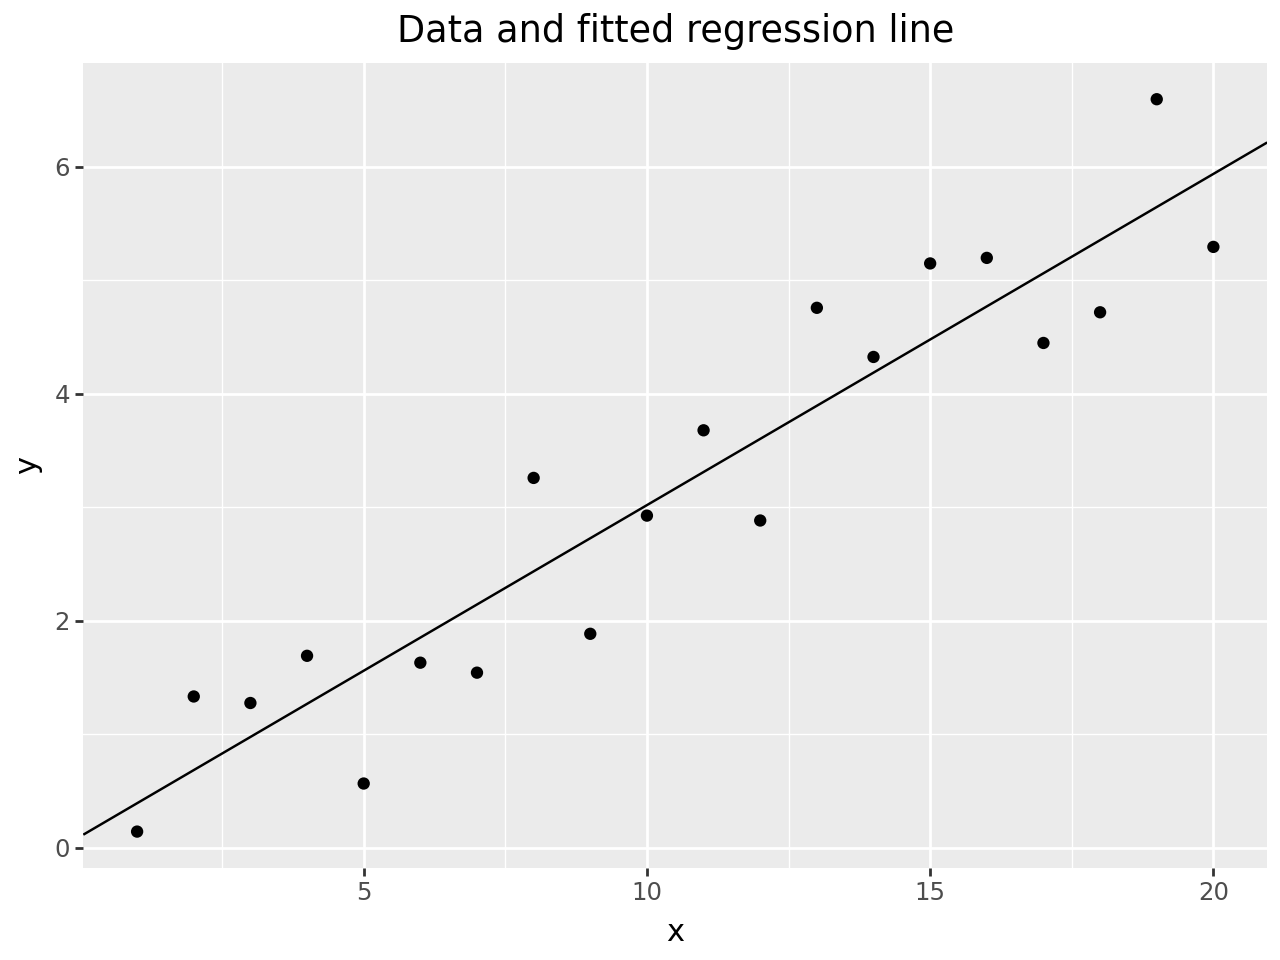

In [ ]:
(ggplot(sim_df, aes(x='x', y='y')) +
 geom_point() +                                   # scatter plot
 geom_abline(intercept=ols_result.params['const'], slope=ols_result.params['x']) +      # regression line
 ggtitle("Data and fitted regression line"))

### Height and earnings Example

In [ ]:
earnings = pd.read_csv('/content/earnings.csv')
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [ ]:
y = earnings['earnk']
X = earnings[['height','male']]

model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[ 0.64695984 10.63266877]
-25.8721860110369


## Linear regression with a single predictor

### predicting presidential vote share from the economy

In [ ]:
df = pd.read_csv('/content/hibbs.dat',sep="\s+")
df

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


In [ ]:
x_elec = df['growth']
y_elec = df['vote']

model = sm.OLS(y_elec, sm.add_constant(x_elec)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           0.000610
Time:                        14:27:07   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2476      1.622     28.514      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16


## Formulating comparisons as regression models

### Estimating the mean is the same as regressing on a constant term

In [ ]:
n_0 = 30
y_0 = np.random.normal(loc=2.0, scale=5.0, size=n_0)
fake_0 = pd.DataFrame({'y_0': y_0})
print(y_0)
print(np.mean(y_0))
print(np.std(y_0)/(n_0**0.5))

[ 2.8619116  -2.72059812 -7.94469397 -4.46089347  2.67337303 -1.47523241
 -0.22052943  5.34665817 10.72563803 -4.9361992  10.19591881 -1.79075697
  4.29687722 -2.50314106  8.10167772  2.43285762 -4.80367447 -1.60442258
 -7.95581166 -6.02634457  5.68140715 10.7324866   5.12545288  1.50811369
  3.49863815  2.71421225 -0.9053043  -1.22380593  2.37400204  1.66586591]
1.0454560908582544
0.9298979822190511


Fitting a linear regressio with only an intercept term

In [ ]:
# Create data
X = sm.add_constant(np.empty((len(y_0), 0)))  # empty array with constant

# Fit model
model = sm.OLS(y_0, X).fit()

# Get results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 07 Nov 2024   Prob (F-statistic):                nan
Time:                        03:55:51   Log-Likelihood:                -6082.6
No. Observations:                2000   AIC:                         1.217e+04
Df Residuals:                    1999   BIC:                         1.217e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9231      0.113     16.976      0.0

### Estimating a difference is the same as regressing on an indicator variable

In [ ]:
n_1 = 30
y_1 = np.random.normal(loc=8.0, scale=5.0, size=n_1)

# manually calculate the difference between mean and se
diff = np.mean(y_1) - np.mean(y_0)
se_0 = np.std(y_0, ddof=1)/np.sqrt(n_0)
se_1 = np.std(y_1, ddof=1)/np.sqrt(n_1)
se = np.sqrt(se_0**2 + se_1**2)

print(f'Diff = {diff}. se = {se}')

Diff = 4.654711006964222. se = 1.208946222504553


In [ ]:
n = n_0 + n_1
y = np.concatenate([y_0, y_1])
x = np.concatenate([np.zeros(n_0), np.ones(n_1)])

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     14.82
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           0.000297
Time:                        03:59:05   Log-Likelihood:                -176.75
No. Observations:                  60   AIC:                             357.5
Df Residuals:                      58   BIC:                             361.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0455      0.855      1.223      0.2

## Linear regression with multiple predictors

In [ ]:
kidiq = pd.read_csv('/content/kidiq.csv')
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


### Starting with a binary predictor


In [ ]:
model = sm.OLS(kidiq['kid_score'], sm.add_constant(kidiq['mom_hs'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.96e-07
Time:                        00:55:16   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5484      2.059     37.670      0.0

### A single continuous predictor


In [ ]:
model = sm.OLS(kidiq['kid_score'], sm.add_constant(kidiq['mom_iq'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           7.66e-23
Time:                        00:55:55   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7998      5.917      4.360      0.0

### Including both predictors


In [ ]:
model = sm.OLS(kidiq['kid_score'], sm.add_constant(kidiq[['mom_hs','mom_iq']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           2.79e-23
Time:                        00:56:30   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7315      5.875      4.380      0.0

### Interactions


In [ ]:
kidiq['mom_hs:mom_iq'] = kidiq['mom_hs']*kidiq['mom_iq']
model = sm.OLS(kidiq['kid_score'], sm.add_constant(kidiq[['mom_hs','mom_iq','mom_hs:mom_iq']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.07e-24
Time:                        00:59:48   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.4820     13.758     -0.835

In [ ]:
# using stat formula
import statsmodels.formula.api as smf
model = smf.ols(formula="kid_score ~ mom_hs*mom_iq", data=kidiq).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.07e-24
Time:                        01:03:23   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.4820     13.758     -0.835

## Logistic Regression Example

In [ ]:
nes_df = pd.read_csv('/content/nes.txt',sep="\s+")
nes_df.head()

In [ ]:
nes_filter = nes_df.loc[(nes_df['year']==1992),['income','rvote','dvote']].dropna()
nes_filter = nes_filter.loc[(nes_df['rvote']==1) | (nes_df['dvote']==1)]
nes_filter

,income,rvote,dvote
32093,4,1.0,0.0
32094,2,1.0,0.0
32096,1,0.0,1.0
32097,2,1.0,0.0
32098,3,0.0,1.0
...,...,...,...
34029,2,0.0,1.0
34031,1,0.0,1.0
34034,4,1.0,0.0
34036,3,0.0,1.0


In [ ]:
from statsmodels.discrete.discrete_model import Logit

X = nes_filter['income']
y = nes_filter['rvote']

model = Logit(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.660270
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  rvote   No. Observations:                 1179
Model:                          Logit   Df Residuals:                     1177
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.02157
Time:                        00:50:51   Log-Likelihood:                -778.46
converged:                       True   LL-Null:                       -795.62
Covariance Type:            nonrobust   LLR p-value:                 4.672e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4021      0.189     -7.401      0.000      -1.773      -1.031
income         0.3260      0.